In [10]:
import numpy as np
import pandas as pd
import os
import datetime
import matplotlib.pyplot as plt
import seaborn as sns 
from mpl_toolkits.basemap import Basemap
%matplotlib inline

# Load, Transform and Filter Events

In [11]:
# Load
df_events = pd.read_csv("archive/events.csv", parse_dates=["timestamp"])
print("Total # events:", len(df_events))

# Transform
df_events["dayofweek"] = df_events["timestamp"].map(lambda x : x.dayofweek)
df_events["hour"] = df_events["timestamp"].map(lambda x : x.hour)
df_events["minute"] = df_events["timestamp"].map(lambda x : x.minute)

# Filter
idx_china = (df_events["longitude"]>75) &\
            (df_events["longitude"]<135) &\
            (df_events["latitude"]>15) &\
            (df_events["latitude"]<55)
df_events_china = df_events[idx_china]
print("Number of China events:", len(df_events_china))

idx_friday_night = (df_events_china["dayofweek"]==4) &\
                   (df_events_china["hour"]<6)
df_friday_night = df_events_china[idx_friday_night]
print("Number of Friday night events:", len(df_friday_night))

Total # events: 3252950
Number of China events: 2202582
Number of Friday night events: 37808


In [14]:
df_people = pd.read_csv("archive/gender_age_train.csv")
df_joined = pd.merge(df_people, df_friday_night, on="device_id", how="inner")
df_joined["group"].value_counts()

M32-38    2855
M39+      2337
M23-26    2166
M29-31    2005
M27-28    1106
F33-42     812
F29-32     670
F43+       646
M22-       630
F24-26     446
F23-       417
F27-28     366
Name: group, dtype: int64

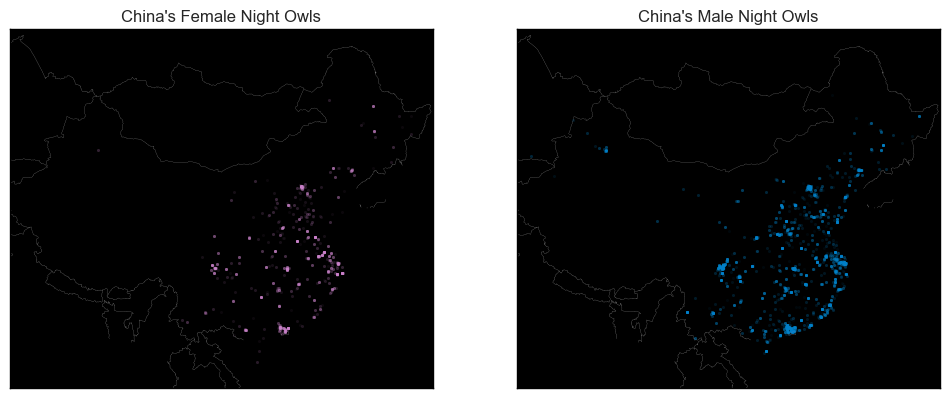

In [15]:
plt.figure(1, figsize=(12,6))

df_f = df_joined[df_joined["gender"] == "F"]
plt.subplot(121)
m1 = Basemap(projection='merc',
            llcrnrlat=15, urcrnrlat=55, llcrnrlon=75, urcrnrlon=135,
            lat_ts=35, resolution='i')
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy1 = m1(df_f["longitude"].tolist(), df_f["latitude"].tolist())
m1.scatter(mxy1[0], mxy1[1], s=5, c="#db92db", lw=0, alpha=0.05, zorder=5)
plt.title("China's Female Night Owls")

df_m = df_joined[df_joined["gender"] == "M"]
plt.subplot(122)
m2 = Basemap(projection='merc',
            llcrnrlat=15, urcrnrlat=55, llcrnrlon=75, urcrnrlon=135,
            lat_ts=35, resolution='i')
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy2 = m2(df_m["longitude"].tolist(), df_m["latitude"].tolist())
m2.scatter(mxy2[0], mxy2[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)
plt.title("China's Male Night Owls")


plt.show()

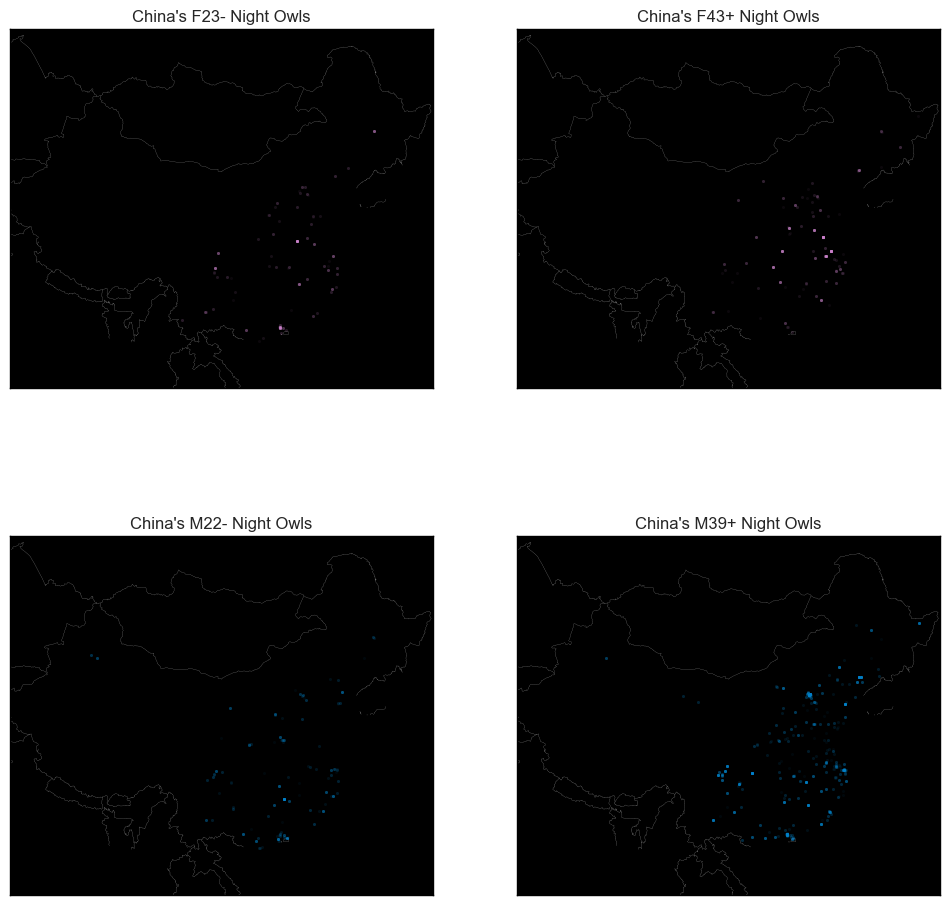

In [16]:
plt.figure(1, figsize=(12,12))

df_f23 = df_joined[df_joined["group"] == "F23-"]
plt.subplot(221)
m1 = Basemap(projection='merc',
            llcrnrlat=15, urcrnrlat=55, llcrnrlon=75, urcrnrlon=135,
            lat_ts=35, resolution='i')
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy1 = m1(df_f23["longitude"].tolist(), df_f23["latitude"].tolist())
m1.scatter(mxy1[0], mxy1[1], s=5, c="#db92db", lw=0, alpha=0.05, zorder=5)
plt.title("China's F23- Night Owls")

df_f43 = df_joined[df_joined["group"] == "F43+"]
plt.subplot(222)
m2 = Basemap(projection='merc',
            llcrnrlat=15, urcrnrlat=55, llcrnrlon=75, urcrnrlon=135,
            lat_ts=35, resolution='i')
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy2 = m2(df_f43["longitude"].tolist(), df_f43["latitude"].tolist())
m2.scatter(mxy2[0], mxy2[1], s=5, c="#db92db", lw=0, alpha=0.05, zorder=5)
plt.title("China's F43+ Night Owls")

df_m22 = df_joined[df_joined["group"] == "M22-"]
plt.subplot(223)
m3 = Basemap(projection='merc',
            llcrnrlat=15, urcrnrlat=55, llcrnrlon=75, urcrnrlon=135,
            lat_ts=35, resolution='i')
m3.drawmapboundary(fill_color='#000000')                # black background
m3.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy3 = m3(df_m22["longitude"].tolist(), df_m22["latitude"].tolist())
m3.scatter(mxy3[0], mxy3[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)
plt.title("China's M22- Night Owls")

df_m39 = df_joined[df_joined["group"] == "M39+"]
plt.subplot(224)
m4 = Basemap(projection='merc',
            llcrnrlat=15, urcrnrlat=55, llcrnrlon=75, urcrnrlon=135,
            lat_ts=35, resolution='i')
m4.drawmapboundary(fill_color='#000000')                # black background
m4.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy4 = m4(df_m39["longitude"].tolist(), df_m39["latitude"].tolist())
m4.scatter(mxy4[0], mxy4[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)
plt.title("China's M39+ Night Owls")

plt.show()

In [26]:
df_events = pd.read_csv("archive/events.csv", dtype={'device_id': np.str})
df_events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


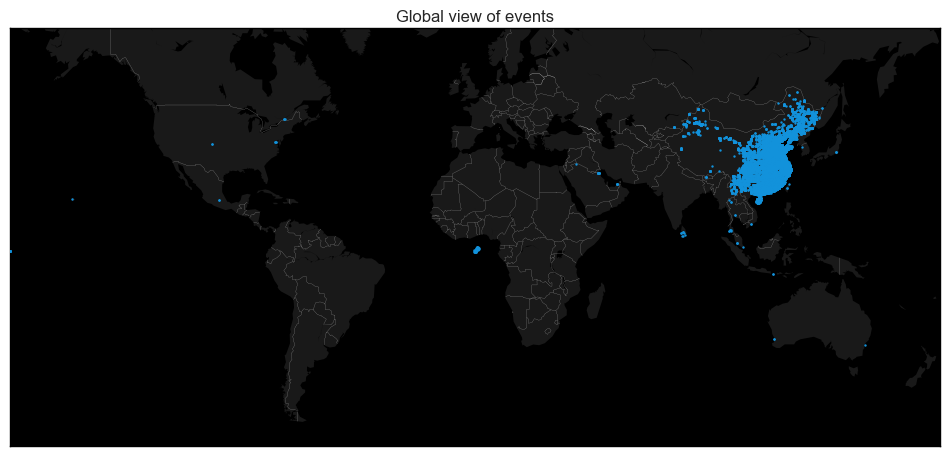

In [36]:
# Set up plot
df_events_sample = df_events.sample(n=100000)
plt.figure(1, figsize=(12,6))

# Mercator of World
m1 = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-180,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

m1.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m1.drawmapboundary(fill_color='#000000')                # black background
m1.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m1(df_events_sample["longitude"].tolist(), df_events_sample["latitude"].tolist())
m1.scatter(mxy[0], mxy[1], s=3, c="#1292db", lw=0, alpha=1, zorder=5)

plt.title("Global view of events")
plt.show()

In [37]:
df_at0 = df_events[(df_events["longitude"]==0) & (df_events["latitude"]==0)]
df_near0 = df_events[(df_events["longitude"]>-1) &\
                     (df_events["longitude"]<1) &\
                     (df_events["latitude"]>-1) &\
                     (df_events["latitude"]<1)]

print("# events:", len(df_events))
print("# at (0,0)", len(df_at0))
print("# near (0,0)", len(df_near0))

# events: 3252950
# at (0,0) 968675
# near (0,0) 969871


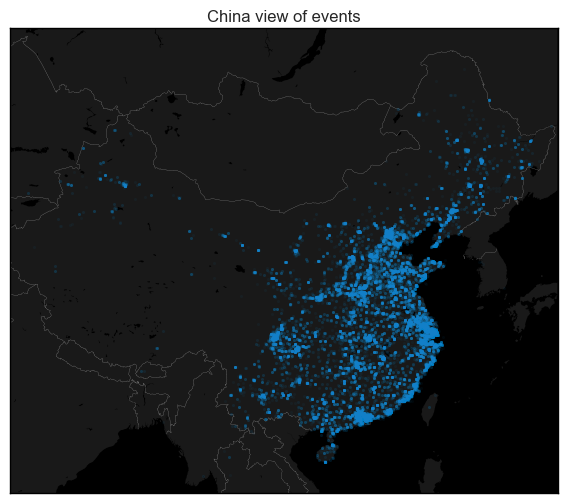

In [38]:
# Sample it down to only the China region
lon_min, lon_max = 75, 135
lat_min, lat_max = 15, 55

idx_china = (df_events["longitude"]>lon_min) &\
            (df_events["longitude"]<lon_max) &\
            (df_events["latitude"]>lat_min) &\
            (df_events["latitude"]<lat_max)

df_events_china = df_events[idx_china].sample(n=100000)

# Mercator of China
plt.figure(2, figsize=(12,6))

m2 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='i')

m2.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m2.drawmapboundary(fill_color='#000000')                # black background
m2.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m2(df_events_china["longitude"].tolist(), df_events_china["latitude"].tolist())
m2.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.05, zorder=5)

plt.title("China view of events")
plt.show()

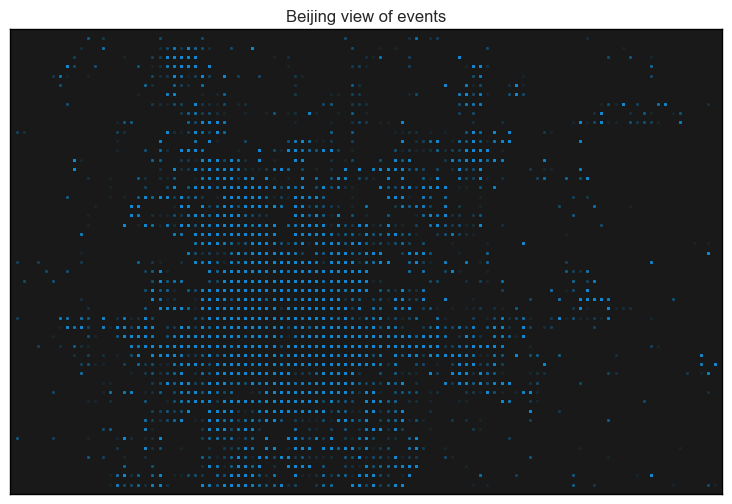

In [39]:
# Sample it down to only the Beijing region
lon_min, lon_max = 116, 117
lat_min, lat_max = 39.75, 40.25

idx_beijing = (df_events["longitude"]>lon_min) &\
              (df_events["longitude"]<lon_max) &\
              (df_events["latitude"]>lat_min) &\
              (df_events["latitude"]<lat_max)

df_events_beijing = df_events[idx_beijing]

# Mercator of Beijing
plt.figure(3, figsize=(12,6))

m3 = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')

m3.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m3.drawmapboundary(fill_color='#000000')                # black background
m3.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders

# Plot the data
mxy = m3(df_events_beijing["longitude"].tolist(), df_events_beijing["latitude"].tolist())
m3.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)

plt.title("Beijing view of events")
plt.show()

In [40]:
# Load the train data and join on the events
df_train = pd.read_csv("archive/gender_age_train.csv", dtype={'device_id': np.str})

df_plot = pd.merge(df_train, df_events_beijing, on="device_id", how="inner")

df_m = df_plot[df_plot["gender"]=="M"]
df_f = df_plot[df_plot["gender"]=="F"]

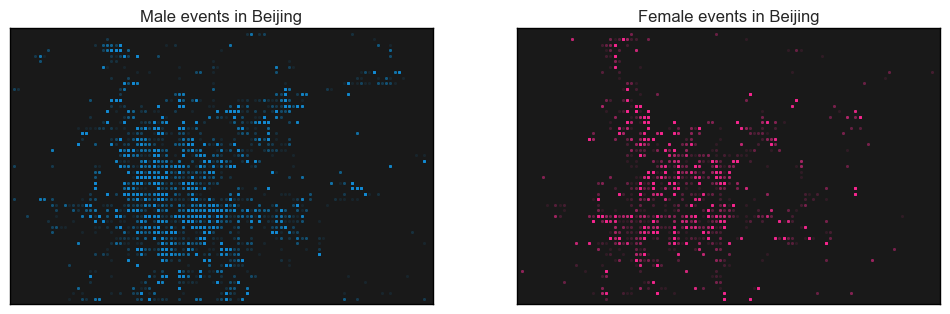

In [41]:
# Male/female plot
plt.figure(4, figsize=(12,6))

plt.subplot(121)
m4a = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')
m4a.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m4a.drawmapboundary(fill_color='#000000')                # black background
m4a.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m4a(df_m["longitude"].tolist(), df_m["latitude"].tolist())
m4a.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)
plt.title("Male events in Beijing")

plt.subplot(122)
m4b = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')
m4b.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
m4b.drawmapboundary(fill_color='#000000')                # black background
m4b.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m4b(df_f["longitude"].tolist(), df_f["latitude"].tolist())
m4b.scatter(mxy[0], mxy[1], s=5, c="#fd3096", lw=0, alpha=0.1, zorder=5)
plt.title("Female events in Beijing")

plt.show()

In [33]:
print("# M obs:", len(df_m))
print("# F obs:", len(df_f))

# M obs: 32899
# F obs: 14888


In [42]:
# Make a pivot table showing average age per area of a grid, also store the counts
df_plot["lon_round"] = df_plot["longitude"].round(decimals=2)
df_plot["lat_round"] = df_plot["latitude"].round(decimals=2)

df_age = pd.pivot_table(df_plot,\
                        values="age",\
                        index="lon_round",\
                        columns="lat_round",\
                        aggfunc=np.mean)

df_cnt = pd.pivot_table(df_plot,\
                        values="age",\
                        index="lon_round",\
                        columns="lat_round",\
                        aggfunc="count")

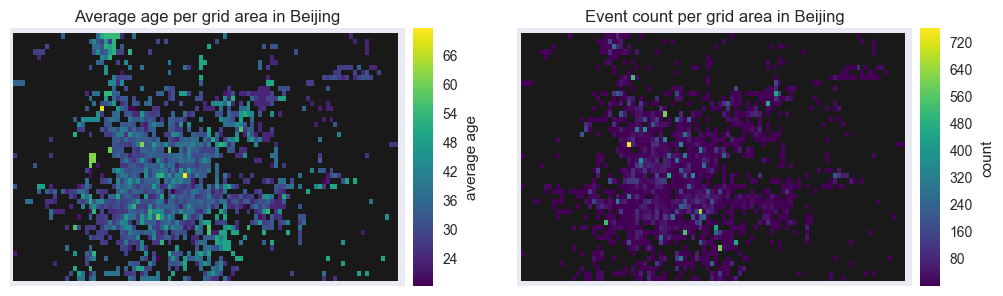

In [43]:
# Age plot
plt.figure(5, figsize=(12,6))

# Plot avg age per grid
plt.subplot(121)
m5a = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')      
# Construct a heatmap
lons = df_age.index.values
lats = df_age.columns.values
x, y = np.meshgrid(lons, lats) 
px, py = m5a(x, y) 
data_values = df_age.values
masked_data = np.ma.masked_invalid(data_values.T)
cmap = plt.cm.viridis
cmap.set_bad(color="#191919")
# Plot the heatmap
m5a.pcolormesh(px, py, masked_data, cmap=cmap, zorder=5)
m5a.colorbar().set_label("average age")
plt.title("Average age per grid area in Beijing")

# Plot count per grid
plt.subplot(122)
m5b = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')      
# Construct a heatmap 
data_values = df_cnt.values
masked_data = np.ma.masked_invalid(data_values.T)
cmap = plt.cm.viridis
cmap.set_bad(color="#191919")
# Plot the heatmap
m5b.pcolormesh(px, py, masked_data, cmap=cmap, zorder=5)
m5b.colorbar().set_label("count")
plt.title("Event count per grid area in Beijing")

plt.show()

## One Day in China

In [1]:
%%HTML
<img src="../images/one-day-in-china.gif">